In [17]:
pip install pycaret[full]

In [18]:
# check installed version
import pycaret
pycaret.__version__

'3.0.4'

In [19]:
from google.colab import files
# upload the csv
uploaded = files.upload()

Saving filtered_cardio1.csv to filtered_cardio1.csv


In [20]:
# import other dependencies
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['filtered_cardio1.csv']))
print(data)

       Unnamed: 0   age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0               0  50.0       2     168    62.0    110     80            1   
1               1  55.0       1     156    85.0    140     90            3   
2               2  52.0       1     165    64.0    130     70            3   
3               3  48.0       2     169    82.0    150    100            1   
4               5  60.0       1     151    67.0    120     80            2   
...           ...   ...     ...     ...     ...    ...    ...          ...   
64329       69994  58.0       1     165    80.0    150     80            1   
64330       69995  53.0       2     168    76.0    120     80            1   
64331       69996  62.0       1     158   126.0    140     90            2   
64332       69998  61.0       1     163    72.0    135     80            1   
64333       69999  56.0       1     170    72.0    120     80            2   

       gluc  smoke  alco  active  cardio  
0         1      0  

In [21]:
!pip install sweetviz


In [22]:
import sweetviz as sv
report =sv.analyze(data, target_feat="cardio")

                                             |          | [  0%]   00:00 -> (? left)


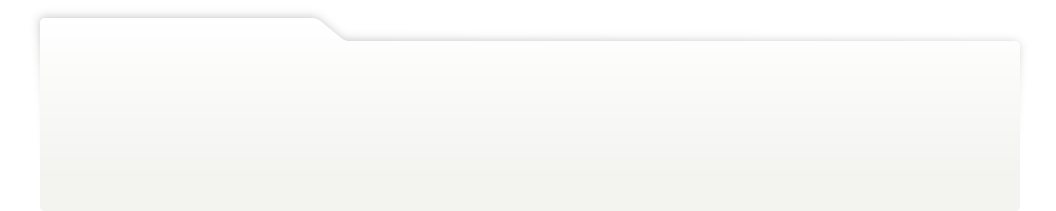
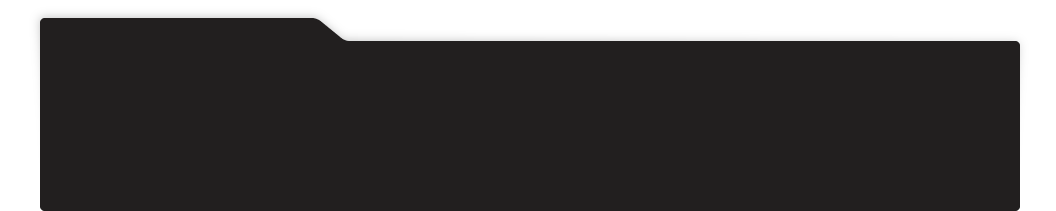
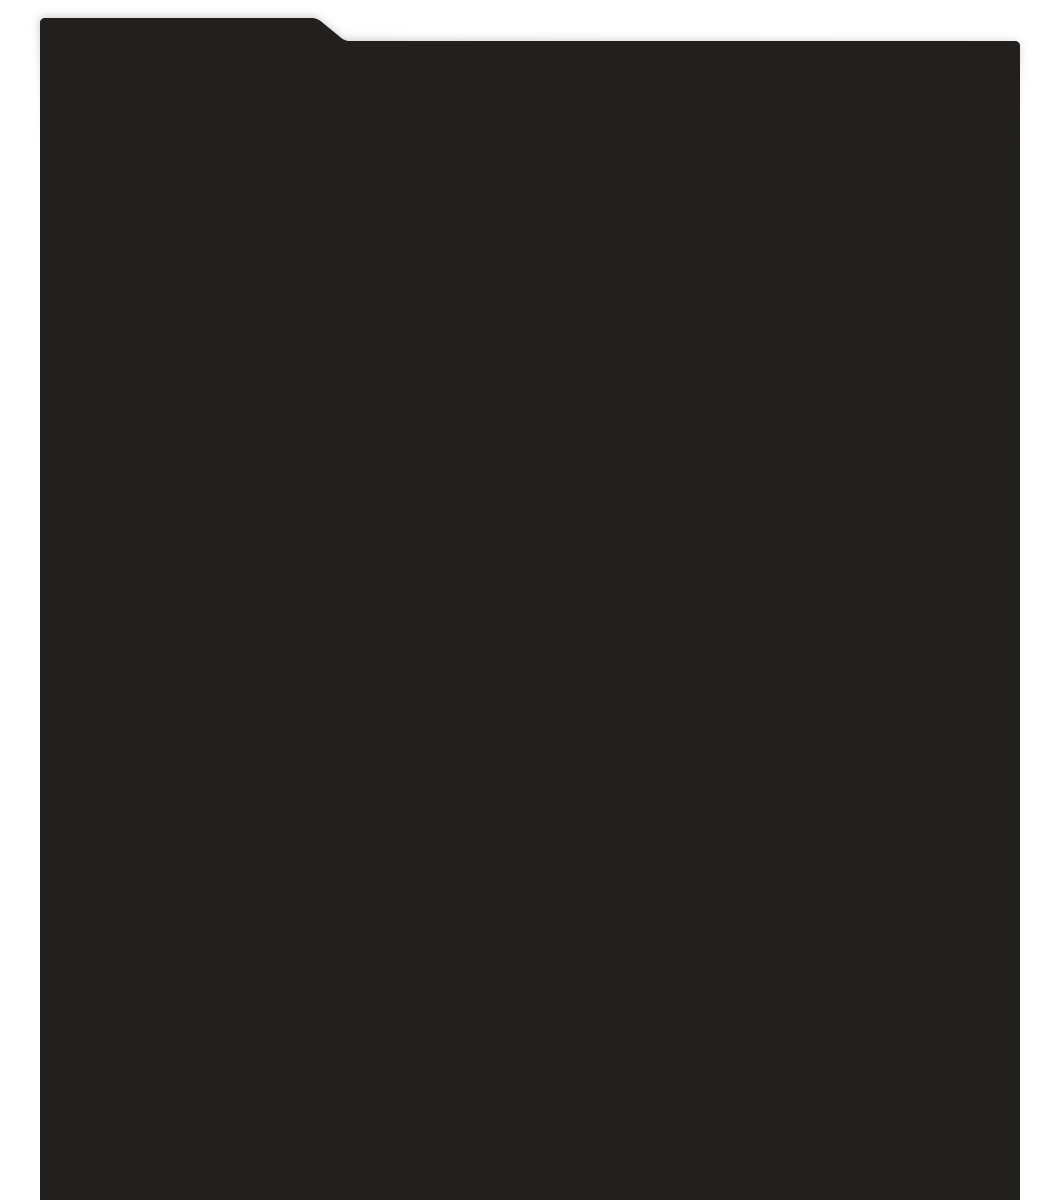
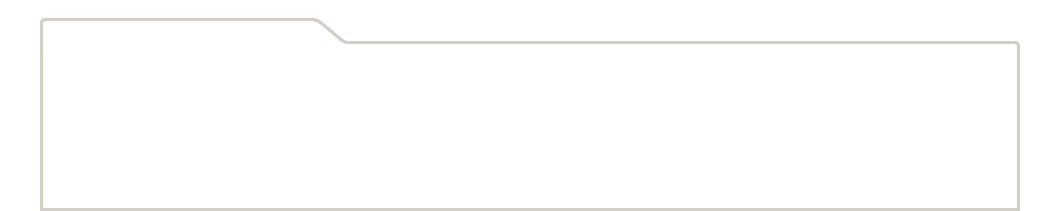
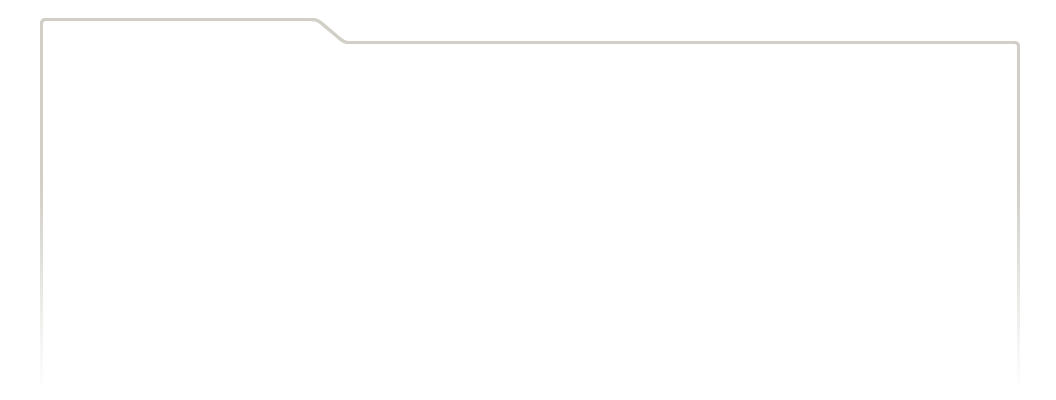
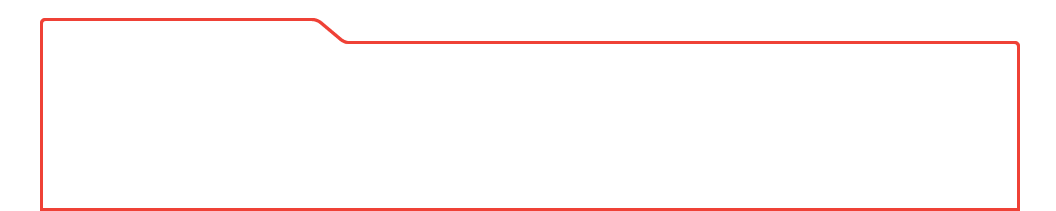
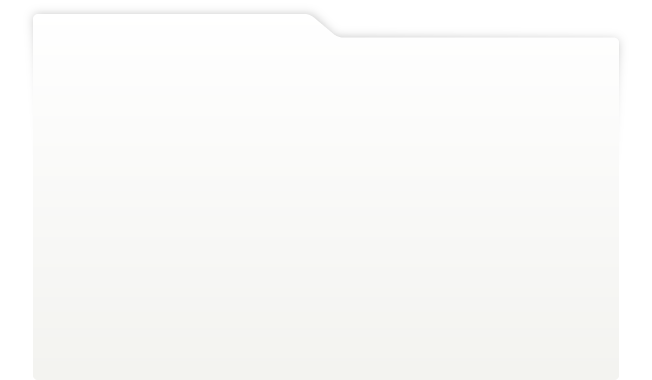
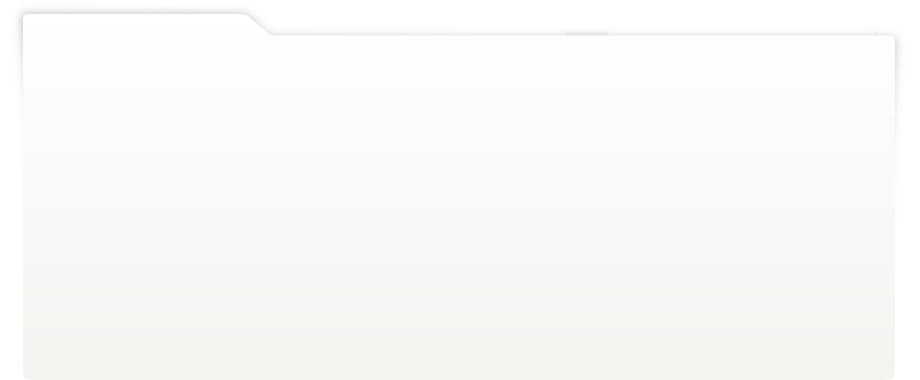
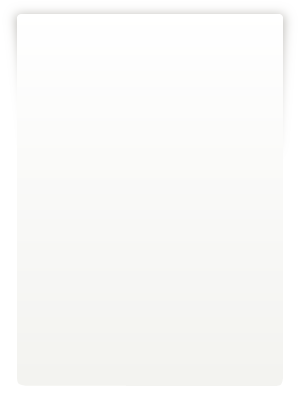
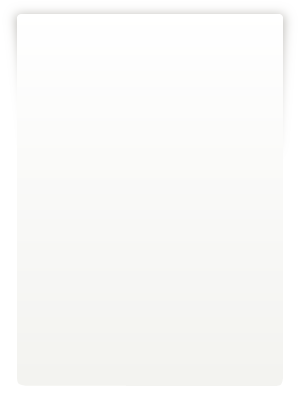
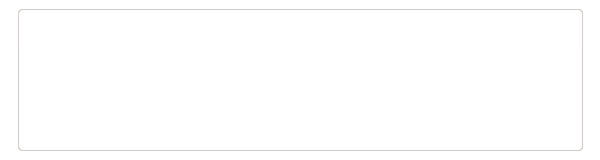
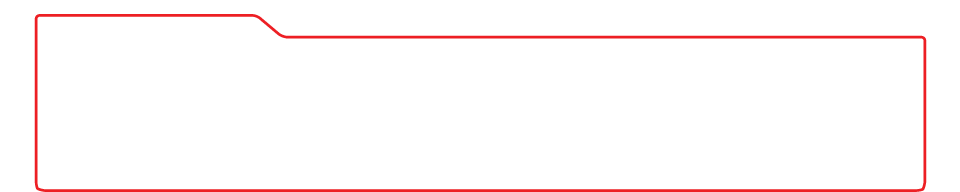
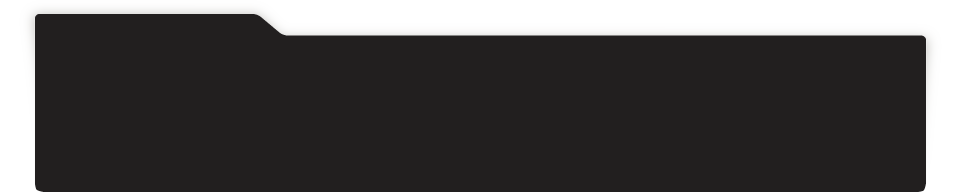
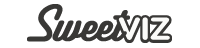
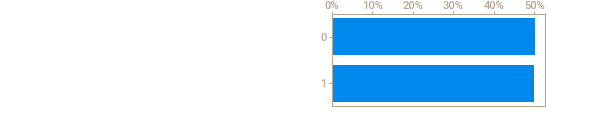
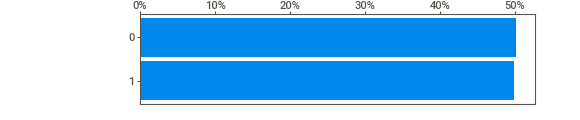
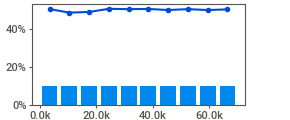
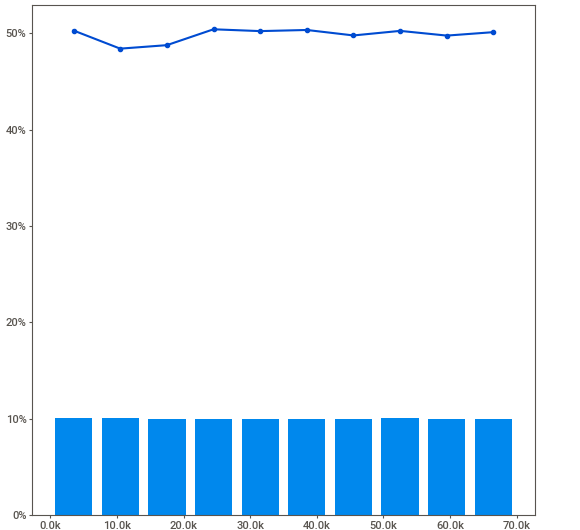
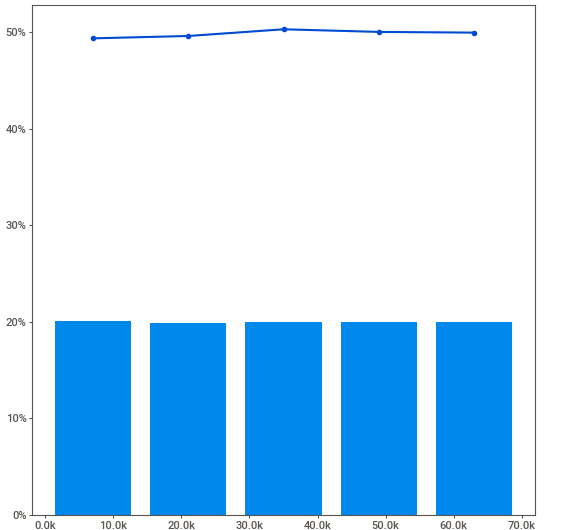
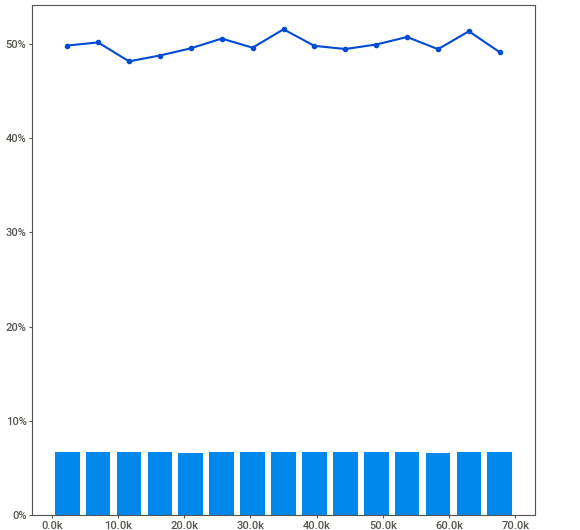
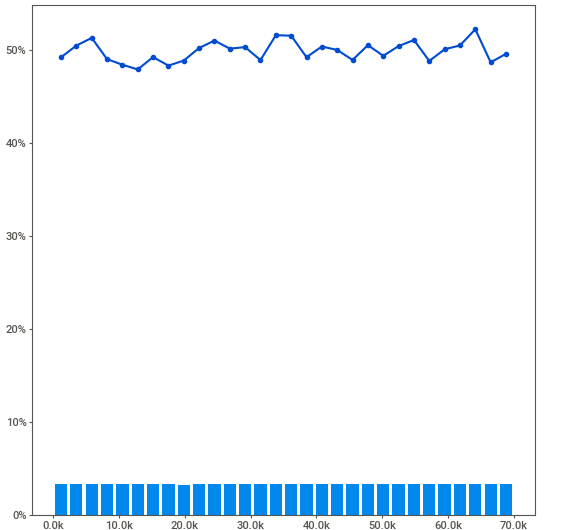
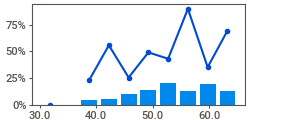
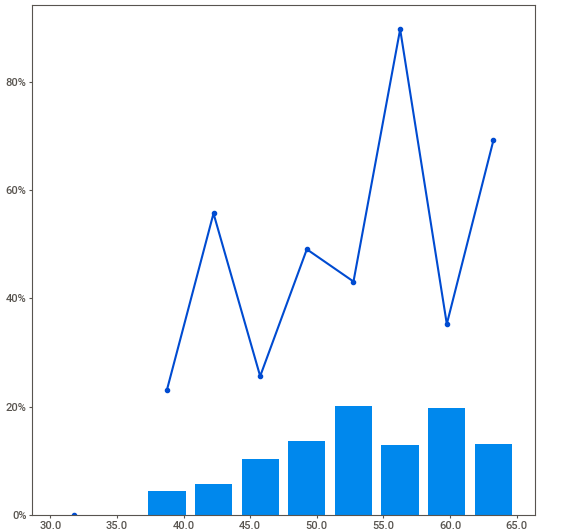
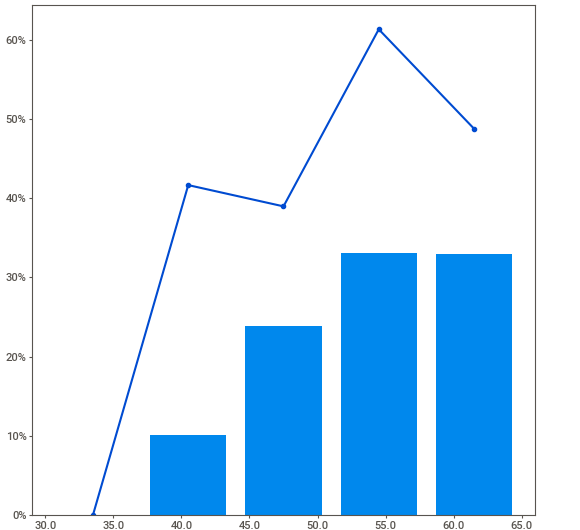
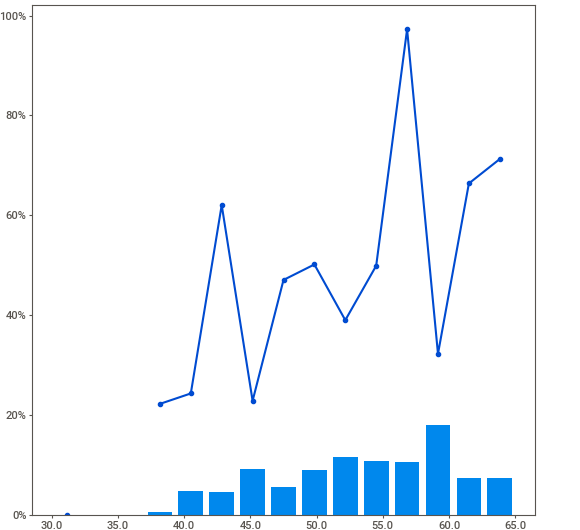
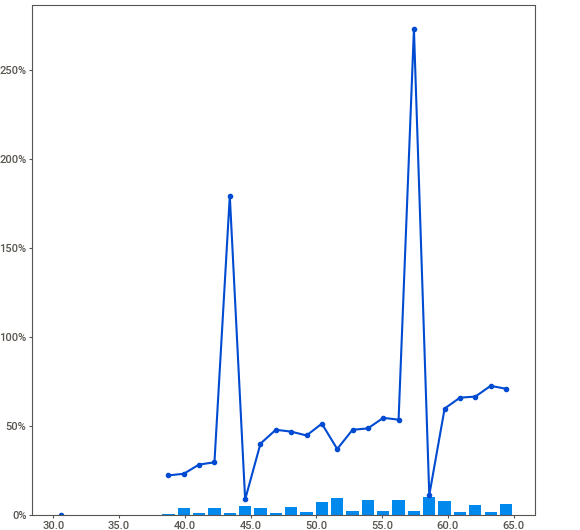
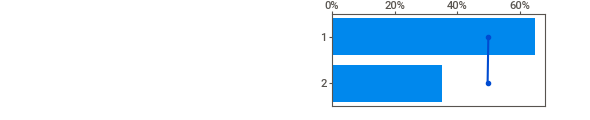
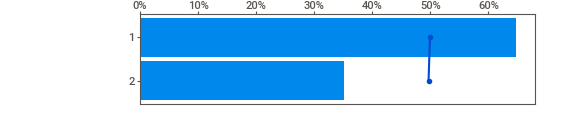
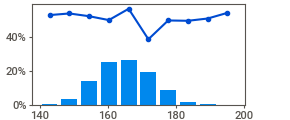
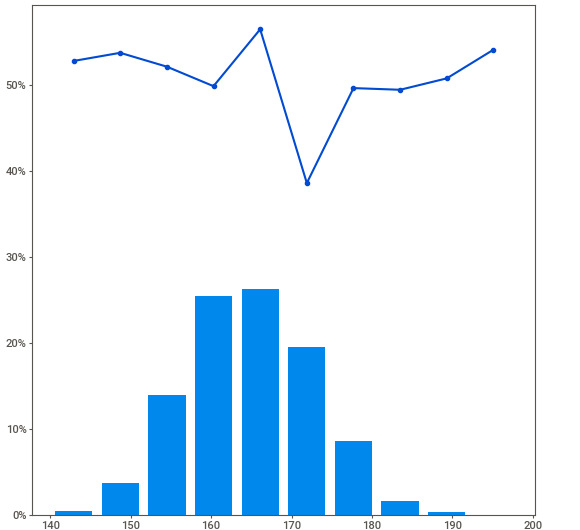
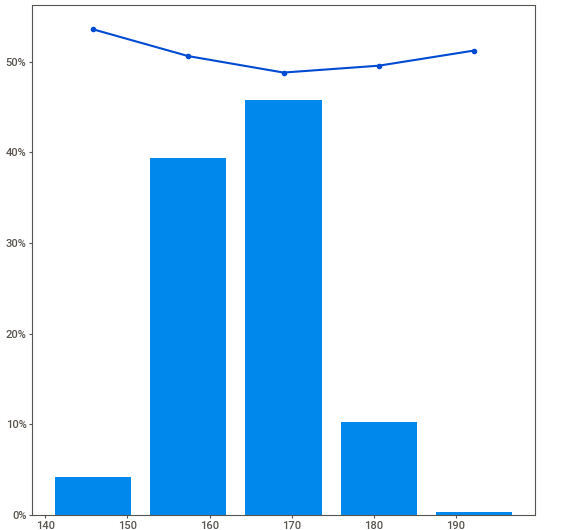
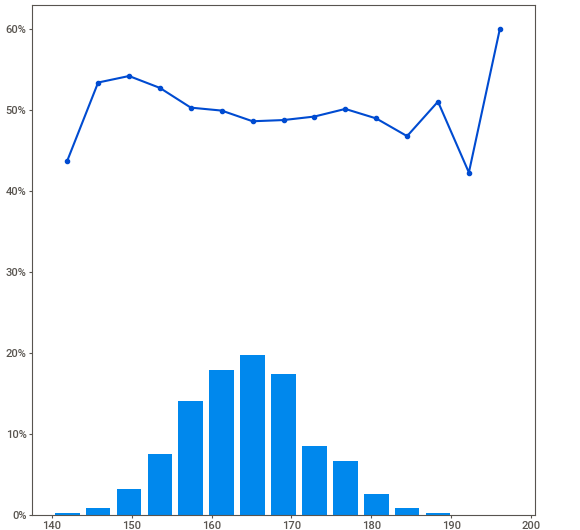
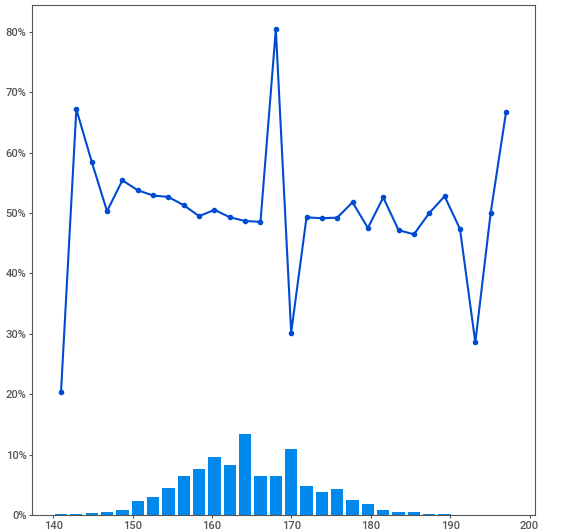
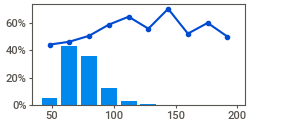
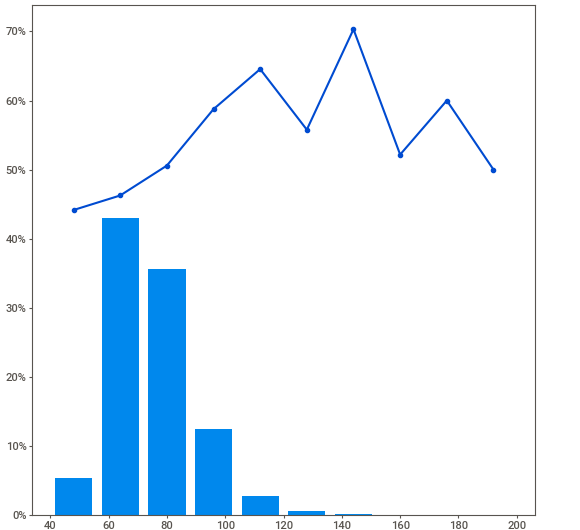
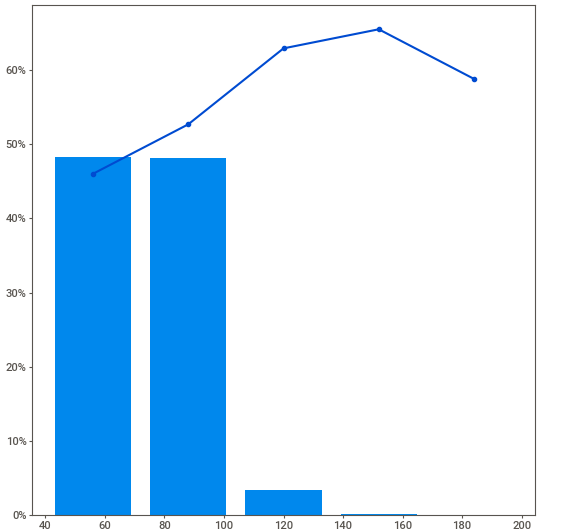
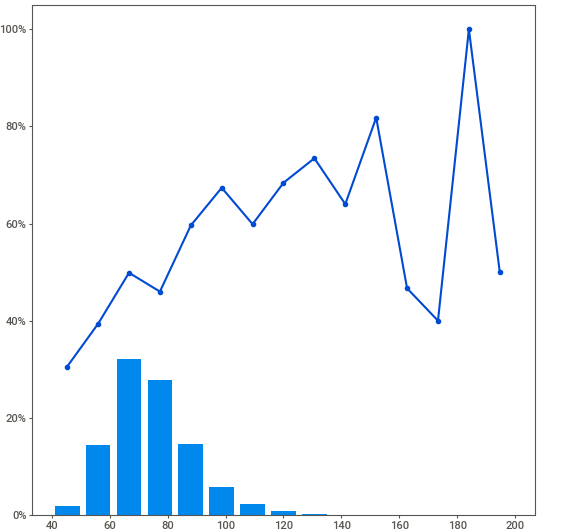
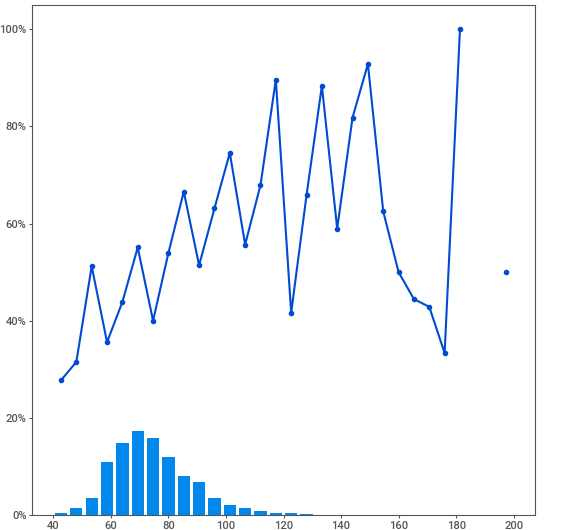
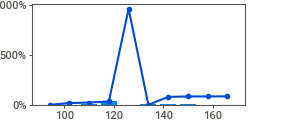
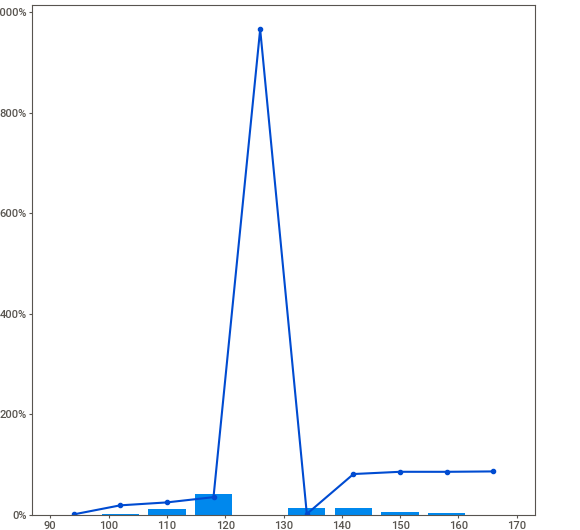
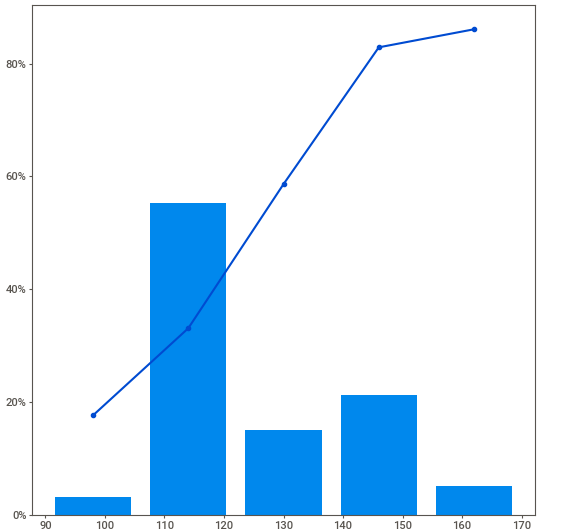
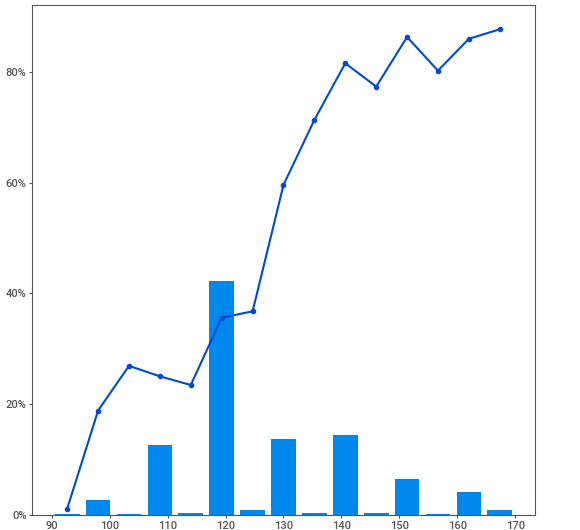
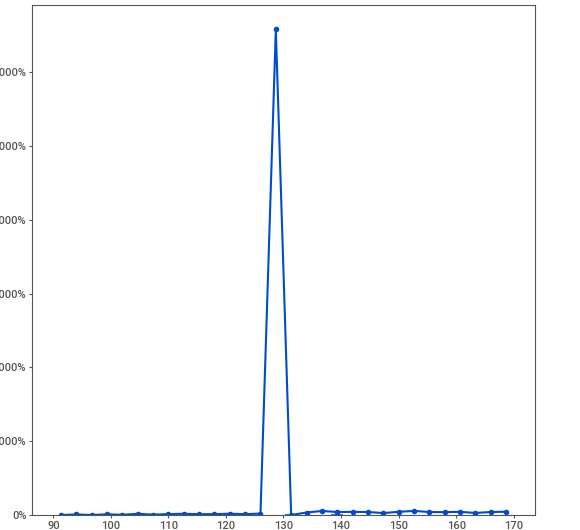
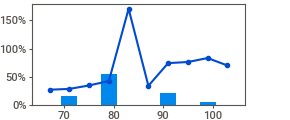
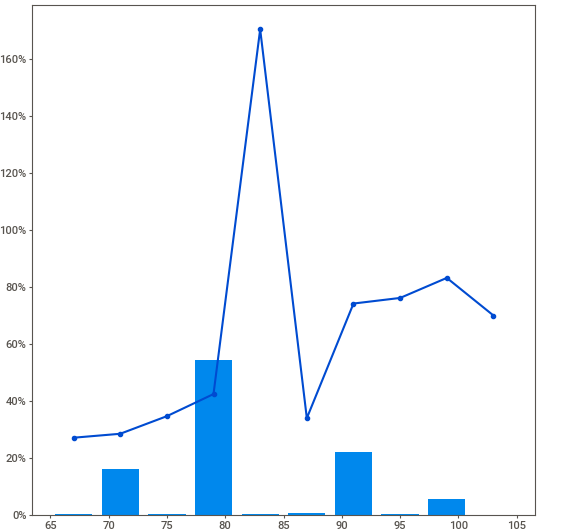
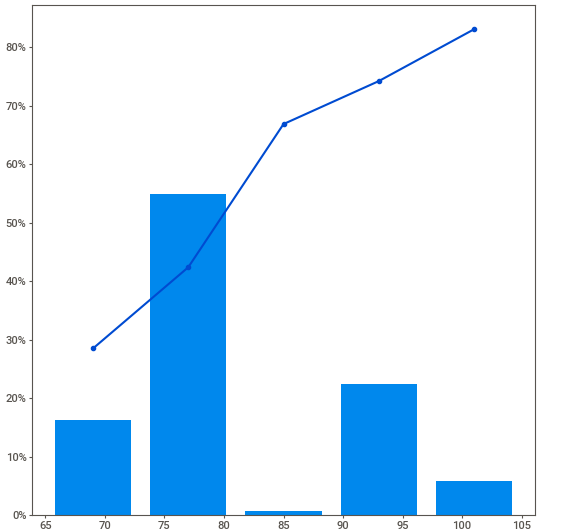
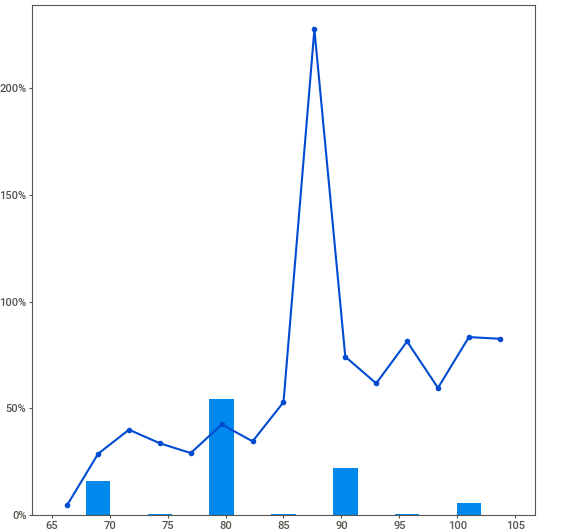
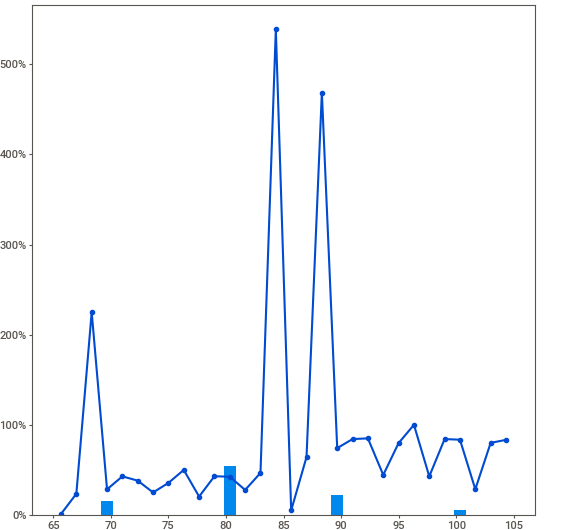
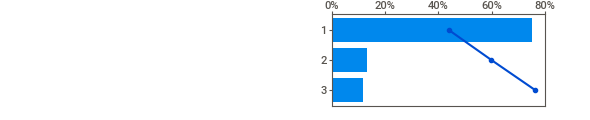
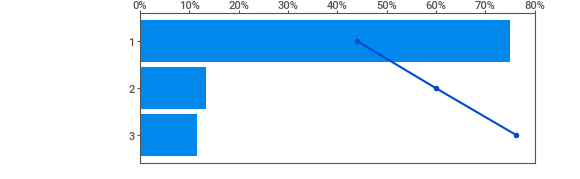
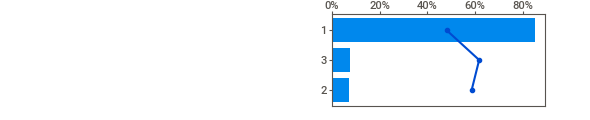
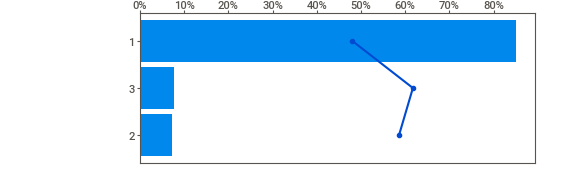
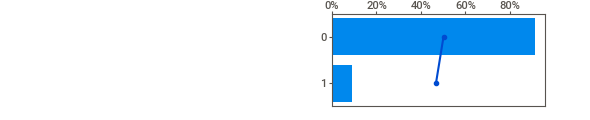
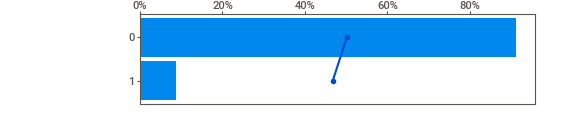
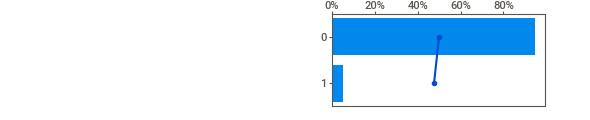
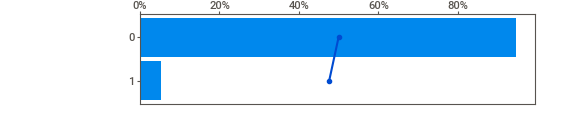
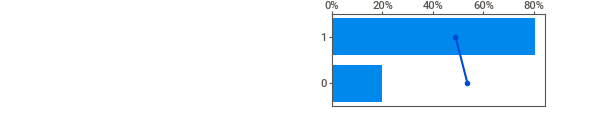
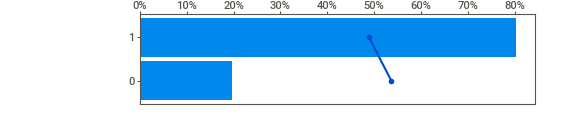
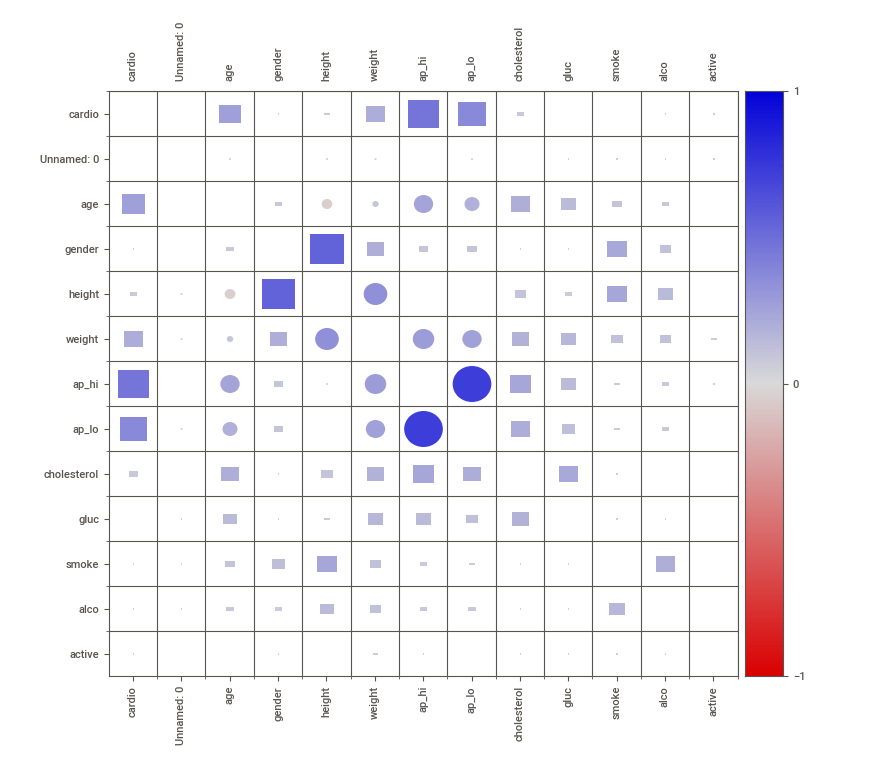
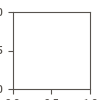

In [23]:
report.show_notebook(layout='widescreen')

In [24]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'cardio', session_id = 123)

,Description,Value
0,Session id,123
1,Target,cardio
2,Target type,Binary
3,Original data shape,"(64334, 13)"
4,Transformed data shape,"(64334, 13)"
5,Transformed train set shape,"(45033, 13)"
6,Transformed test set shape,"(19301, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [25]:
# compare baseline models
best = compare_models()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:26:35
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7295,0.7953,0.6867,0.7497,0.7168,0.4588,0.4604,4.4930
ada,Ada Boost Classifier,0.7238,0.7884,0.6501,0.7610,0.7012,0.4473,0.4521,1.5440
xgboost,Extreme Gradient Boosting,0.7231,0.7858,0.6829,0.7413,0.7109,0.4461,0.4475,3.3510
ridge,Ridge Classifier,0.7214,0.0000,0.6492,0.7574,0.6991,0.4427,0.4472,0.1930
lda,Linear Discriminant Analysis,0.7214,0.7867,0.6492,0.7574,0.6991,0.4427,0.4472,0.1640
nb,Naive Bayes,0.7145,0.7822,0.6014,0.7756,0.6774,0.4287,0.4399,0.1190
rf,Random Forest Classifier,0.7121,0.7735,0.6894,0.7209,0.7048,0.4241,0.4245,5.6180
qda,Quadratic Discriminant Analysis,0.7067,0.7673,0.6219,0.7475,0.6788,0.4132,0.4192,0.1150
et,Extra Trees Classifier,0.7017,0.7622,0.6832,0.7081,0.6954,0.4033,0.4036,6.1230
lr,Logistic Regression,0.6983,0.7548,0.6503,0.7180,0.6825,0.3965,0.3983,1.1330


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7295,0.7953,0.6867,0.7497,0.7168,0.4588,0.4604,4.4930
catboost,CatBoost Classifier,0.7288,0.7932,0.6868,0.7486,0.7163,0.4575,0.4591,13.2400
lightgbm,Light Gradient Boosting Machine,0.7285,0.7941,0.6870,0.7479,0.7161,0.4568,0.4584,2.0520
ada,Ada Boost Classifier,0.7238,0.7884,0.6501,0.7610,0.7012,0.4473,0.4521,1.5440
xgboost,Extreme Gradient Boosting,0.7231,0.7858,0.6829,0.7413,0.7109,0.4461,0.4475,3.3510
ridge,Ridge Classifier,0.7214,0.0000,0.6492,0.7574,0.6991,0.4427,0.4472,0.1930
lda,Linear Discriminant Analysis,0.7214,0.7867,0.6492,0.7574,0.6991,0.4427,0.4472,0.1640
nb,Naive Bayes,0.7145,0.7822,0.6014,0.7756,0.6774,0.4287,0.4399,0.1190
rf,Random Forest Classifier,0.7121,0.7735,0.6894,0.7209,0.7048,0.4241,0.4245,5.6180
qda,Quadratic Discriminant Analysis,0.7067,0.7673,0.6219,0.7475,0.6788,0.4132,0.4192,0.1150


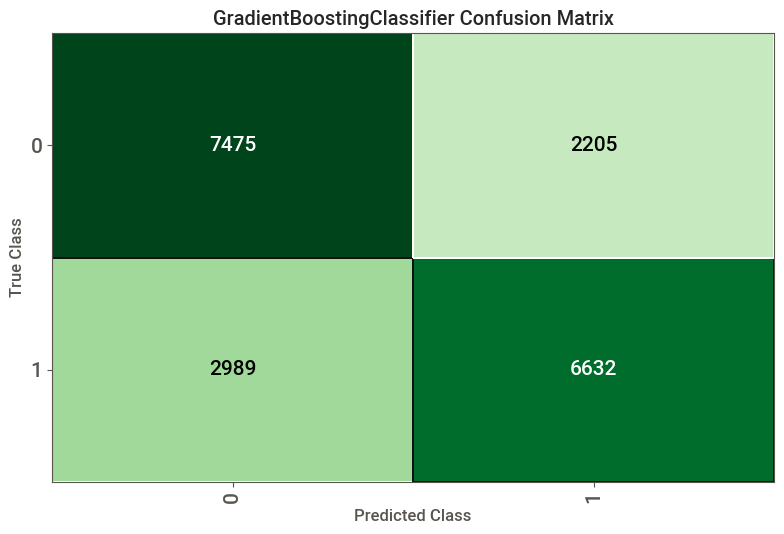

In [26]:
# plot confusion matrix for Gradient Boosting Classifier (best)
plot_model(best, plot = 'confusion_matrix')

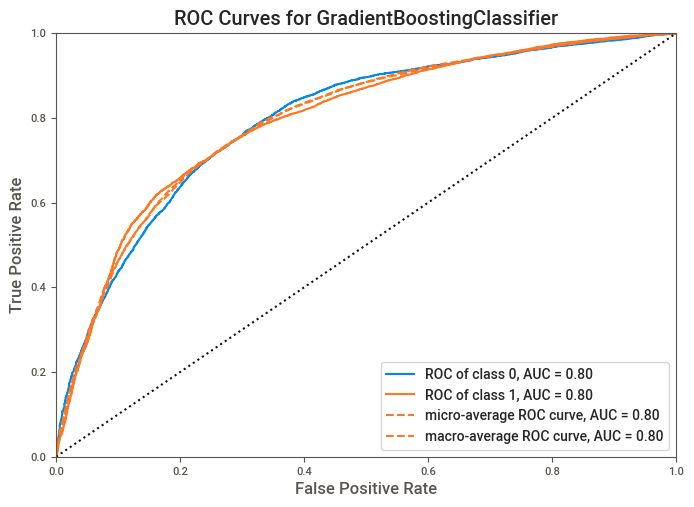

In [27]:
# plot AUC for Gradient Boosting Classifier (best)
plot_model(best, plot = 'auc')

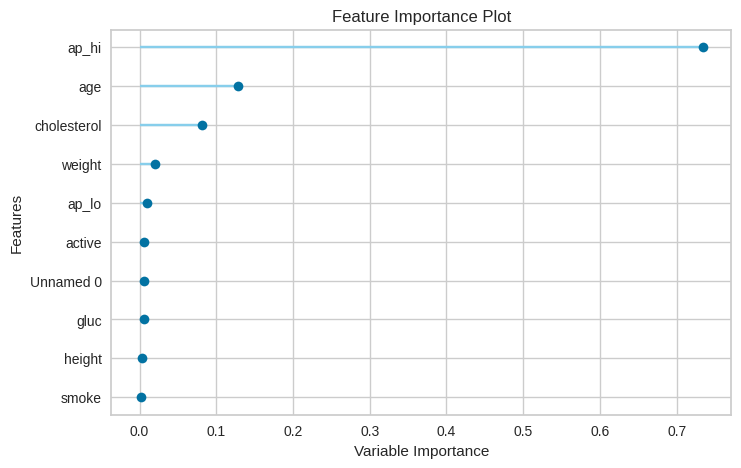

In [14]:
# plot feature importance for Gradient Boosting Classifier (best)
plot_model(best, plot = 'feature')

In [15]:
# evaluate Gradient Boosting Classifier (best)
evaluate_model(best)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
# tune hyperparameters to optimize AUC
tuned_best = tune_model(best, optimize = 'AUC') #default is 'Accuracy'

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:59:35
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Results
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7242,0.7943,0.6610,0.7552,0.7050,0.4483,0.4518
1,0.7369,0.8044,0.6793,0.7663,0.7202,0.4736,0.4767
2,0.7305,0.7952,0.6610,0.7661,0.7097,0.4607,0.4651
3,0.7327,0.8003,0.6592,0.7712,0.7109,0.4651,0.4701
4,0.7340,0.8027,0.6735,0.7648,0.7162,0.4678,0.4712
5,0.7326,0.7954,0.6655,0.7673,0.7128,0.4650,0.4692
6,0.7209,0.7894,0.6628,0.7485,0.7030,0.4415,0.4444
7,0.7240,0.7858,0.6566,0.7575,0.7034,0.4477,0.4517
8,0.7231,0.7866,0.6543,0.7572,0.7020,0.4459,0.4501


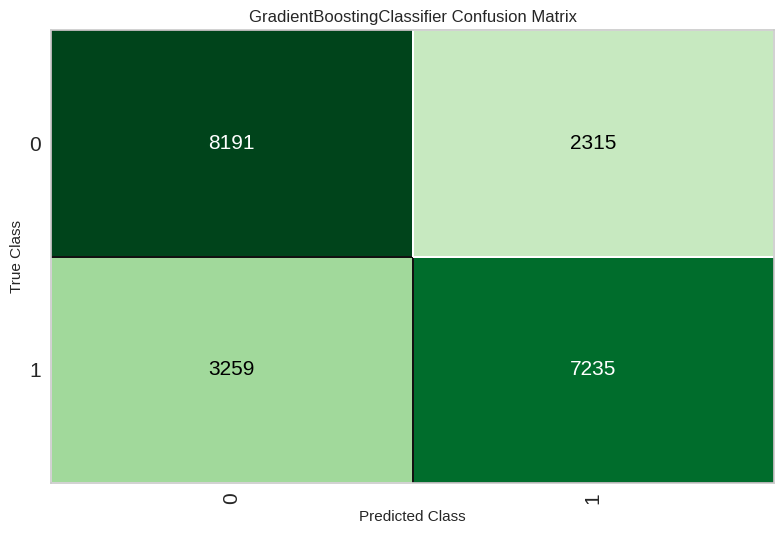

In [ ]:
# plot confusion matrix for	Gradient Boosting Classifier optimized by AUC
plot_model(tuned_best, plot = 'confusion_matrix')

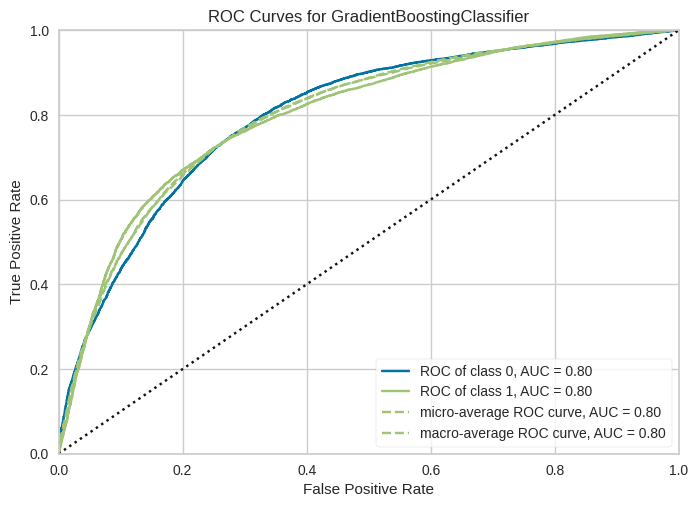

In [ ]:
# plot AUC for Gradient Boosting Classifier optimized by AUC
plot_model(tuned_best, plot = 'auc')


In [ ]:
# train Light Gradient Boosting Machine model with default params
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7320,0.7977,0.6819,0.7577,0.7178,0.4641,0.4664
1,0.7357,0.8004,0.7048,0.7511,0.7272,0.4714,0.4723
2,0.7353,0.8002,0.6929,0.7569,0.7235,0.4706,0.4723
3,0.7302,0.7910,0.6868,0.7519,0.7179,0.4604,0.4621
4,0.7437,0.8127,0.7003,0.7667,0.7320,0.4873,0.4892
5,0.7347,0.8029,0.6883,0.7583,0.7216,0.4693,0.4714
6,0.7365,0.7978,0.7190,0.7448,0.7317,0.4730,0.4733
7,0.7451,0.8121,0.7075,0.7647,0.7350,0.4902,0.4915
8,0.7353,0.7992,0.6793,0.7646,0.7194,0.4706,0.4735


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune Light Gradient Boosting Machine model with an increased number of iterations
tuned_lightgbm = tune_model(lightgbm, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7335,0.7995,0.6897,0.7557,0.7212,0.4669,0.4687
1,0.7373,0.8007,0.7089,0.7515,0.7296,0.4747,0.4754
2,0.7361,0.8015,0.6978,0.7555,0.7255,0.4722,0.4736
3,0.7320,0.7921,0.6938,0.7511,0.7213,0.4641,0.4654
4,0.7459,0.8122,0.7080,0.7659,0.7358,0.4918,0.4932
5,0.7310,0.8026,0.6867,0.7531,0.7184,0.4620,0.4638
6,0.7361,0.7987,0.7128,0.7473,0.7297,0.4722,0.4727
7,0.7494,0.8136,0.7100,0.7704,0.7389,0.4987,0.5003
8,0.7384,0.8014,0.6867,0.7655,0.7239,0.4767,0.4792


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


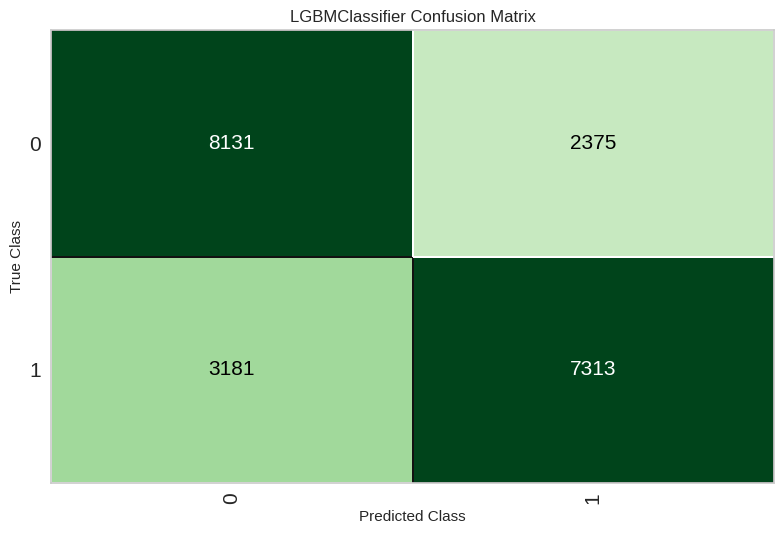

In [ ]:
#Plot Confusion Matrix for tuned Light Gradient Boosting Machine
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [ ]:
# tune hyperparameters of Light Gradient Boosting Machine with default number of iterations
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7335,0.7995,0.6897,0.7557,0.7212,0.4669,0.4687
1,0.7373,0.8007,0.7089,0.7515,0.7296,0.4747,0.4754
2,0.7361,0.8015,0.6978,0.7555,0.7255,0.4722,0.4736
3,0.7320,0.7921,0.6938,0.7511,0.7213,0.4641,0.4654
4,0.7459,0.8122,0.7080,0.7659,0.7358,0.4918,0.4932
5,0.7310,0.8026,0.6867,0.7531,0.7184,0.4620,0.4638
6,0.7361,0.7987,0.7128,0.7473,0.7297,0.4722,0.4727
7,0.7494,0.8136,0.7100,0.7704,0.7389,0.4987,0.5003
8,0.7384,0.8014,0.6867,0.7655,0.7239,0.4767,0.4792


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# create Light Gradient Boosting Machine model
gbc=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7318,0.7996,0.6791,0.7590,0.7168,0.4637,0.4662
1,0.7335,0.7991,0.7036,0.7482,0.7252,0.4669,0.4678
2,0.7345,0.8007,0.6889,0.7579,0.7217,0.4690,0.4709
3,0.7294,0.7920,0.6933,0.7470,0.7192,0.4588,0.4599
4,0.7463,0.8128,0.7003,0.7711,0.7340,0.4926,0.4947
5,0.7320,0.8018,0.6842,0.7562,0.7184,0.4640,0.4662
6,0.7363,0.7986,0.7165,0.7457,0.7308,0.4726,0.4730
7,0.7463,0.8131,0.7083,0.7662,0.7361,0.4926,0.4940
8,0.7359,0.8009,0.6773,0.7669,0.7193,0.4718,0.4750


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#Create Extra Trees Classifier
et=create_model("et")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7086,0.7730,0.6905,0.7162,0.7031,0.4171,0.4174
1,0.7129,0.7755,0.6995,0.7185,0.7089,0.4257,0.4259
2,0.7220,0.7761,0.7036,0.7304,0.7167,0.4441,0.4444
3,0.6965,0.7585,0.6840,0.7014,0.6926,0.3931,0.3932
4,0.7259,0.7946,0.7162,0.7302,0.7231,0.4518,0.4519
5,0.7063,0.7741,0.6900,0.7130,0.7013,0.4126,0.4129
6,0.7163,0.7760,0.7157,0.7163,0.7160,0.4327,0.4327
7,0.7282,0.7910,0.7136,0.7347,0.7240,0.4563,0.4565
8,0.7104,0.7697,0.6900,0.7190,0.7042,0.4208,0.4211


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6484,0.7081,0.6047,0.6623,0.6322,0.2967,0.2978
1,0.6473,0.7112,0.6039,0.6612,0.6312,0.2947,0.2958
2,0.6549,0.7235,0.6166,0.6676,0.6411,0.3098,0.3107
3,0.6357,0.6990,0.5917,0.6486,0.6188,0.2714,0.2725
4,0.6598,0.7263,0.6105,0.6771,0.6420,0.3196,0.3211
5,0.6459,0.7072,0.5940,0.6624,0.6263,0.2918,0.2933
6,0.6559,0.7176,0.6397,0.6608,0.6501,0.3118,0.3120
7,0.6669,0.7290,0.6336,0.6785,0.6553,0.3338,0.3346
8,0.6524,0.7203,0.6172,0.6636,0.6396,0.3049,0.3056


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *['  '], **{})
chart

In [ ]:
# tune Extra Trees Classifier with 50 iterations
tuned_et=tune_model(et, n_iter = 50)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7153,0.7806,0.6835,0.7297,0.7059,0.4306,0.4315
1,0.7280,0.7875,0.6974,0.7426,0.7193,0.4559,0.4568
2,0.7214,0.7862,0.6897,0.7363,0.7122,0.4428,0.4437
3,0.7090,0.7734,0.6795,0.7219,0.7000,0.4179,0.4187
4,0.7306,0.7970,0.6917,0.7499,0.7196,0.4612,0.4626
5,0.7212,0.7836,0.6850,0.7381,0.7106,0.4424,0.4436
6,0.7204,0.7856,0.7083,0.7255,0.7168,0.4408,0.4409
7,0.7347,0.8030,0.7079,0.7476,0.7272,0.4694,0.4700
8,0.7320,0.7889,0.6912,0.7523,0.7205,0.4640,0.4656


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [ ]:
# tune hyperparameters for Extra Trees Classifier by optimizing Recall
tuned_et_byRecall = tune_model(et, optimize = 'Recall') #default is 'Accuracy'

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4998,0.5000,1.0000,0.4998,0.6665,0.0000,0.0000
1,0.4998,0.5000,1.0000,0.4998,0.6665,0.0000,0.0000
2,0.4998,0.5000,1.0000,0.4998,0.6665,0.0000,0.0000
3,0.4998,0.5000,1.0000,0.4998,0.6665,0.0000,0.0000
4,0.4998,0.5000,1.0000,0.4998,0.6665,0.0000,0.0000
5,0.4996,0.5000,1.0000,0.4996,0.6663,0.0000,0.0000
6,0.4996,0.5000,1.0000,0.4996,0.6663,0.0000,0.0000
7,0.4996,0.5000,1.0000,0.4996,0.6663,0.0000,0.0000
8,0.4996,0.5000,1.0000,0.4996,0.6663,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#Import numpy
import numpy as np
 #tune hyperparameters for Extra Trees Classifier with custom_grid
params = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }

tuned_et_custom = tune_model(et, custom_grid = params)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6935,0.7613,0.6439,0.7145,0.6774,0.3869,0.3888
1,0.7073,0.7668,0.6623,0.7277,0.6935,0.4147,0.4164
2,0.7086,0.7731,0.6721,0.7248,0.6975,0.4171,0.4182
3,0.6867,0.7519,0.6521,0.7004,0.6754,0.3735,0.3743
4,0.7133,0.7810,0.6782,0.7291,0.7028,0.4265,0.4276
5,0.6996,0.7644,0.6663,0.7135,0.6891,0.3992,0.4000
6,0.7067,0.7700,0.6822,0.7170,0.6992,0.4134,0.4139
7,0.7176,0.7884,0.6830,0.7333,0.7073,0.4351,0.4361
8,0.7120,0.7721,0.6663,0.7330,0.6981,0.4240,0.4258


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# tune hyperparameters for Extra Trees Classifier by optimizing AUC and increasing the number of iterations to 50
tuned_et_byAUC = tune_model(et, optimize = 'AUC', n_iter=50) #default is 'Accuracy'

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7153,0.7806,0.6835,0.7297,0.7059,0.4306,0.4315
1,0.7280,0.7875,0.6974,0.7426,0.7193,0.4559,0.4568
2,0.7214,0.7862,0.6897,0.7363,0.7122,0.4428,0.4437
3,0.7090,0.7734,0.6795,0.7219,0.7000,0.4179,0.4187
4,0.7306,0.7970,0.6917,0.7499,0.7196,0.4612,0.4626
5,0.7212,0.7836,0.6850,0.7381,0.7106,0.4424,0.4436
6,0.7204,0.7856,0.7083,0.7255,0.7168,0.4408,0.4409
7,0.7347,0.8030,0.7079,0.7476,0.7272,0.4694,0.4700
8,0.7320,0.7889,0.6912,0.7523,0.7205,0.4640,0.4656


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits
